Respuesta a pregunta 3 de la tarea 1 de [Criptografía y Seguridad Computacional 2022-1](https://github.com/UC-IIC3253/2022/blob/main/Tareas/Tarea%201/enunciado/main/main.pdf)

Alumno Diego Iruretagoyena

In [1]:
from IPython.display import Image, display

# Merkle Trees

Los Árboles de Merkle o árboles de hash sirven para la verificación eficiente y segura de contenidos en una estructura de datos de gran tamaño. Son estructuras útilizadas en criptografía para verificar datos guardados, manejados y transferidos entre computadores.

En este ejemplo, se utiliza una función criptográfica **h()** para representar un conjunto de strings $S = {s_{1},..., s{m}}$. 

El valor de cada nodo es un string definido recursivamente. Las hojas son $h(s_{1}), ... , h(s_{m})$ y cada nodo interarior corresponde a $h(n_{i}||n_{j})$.




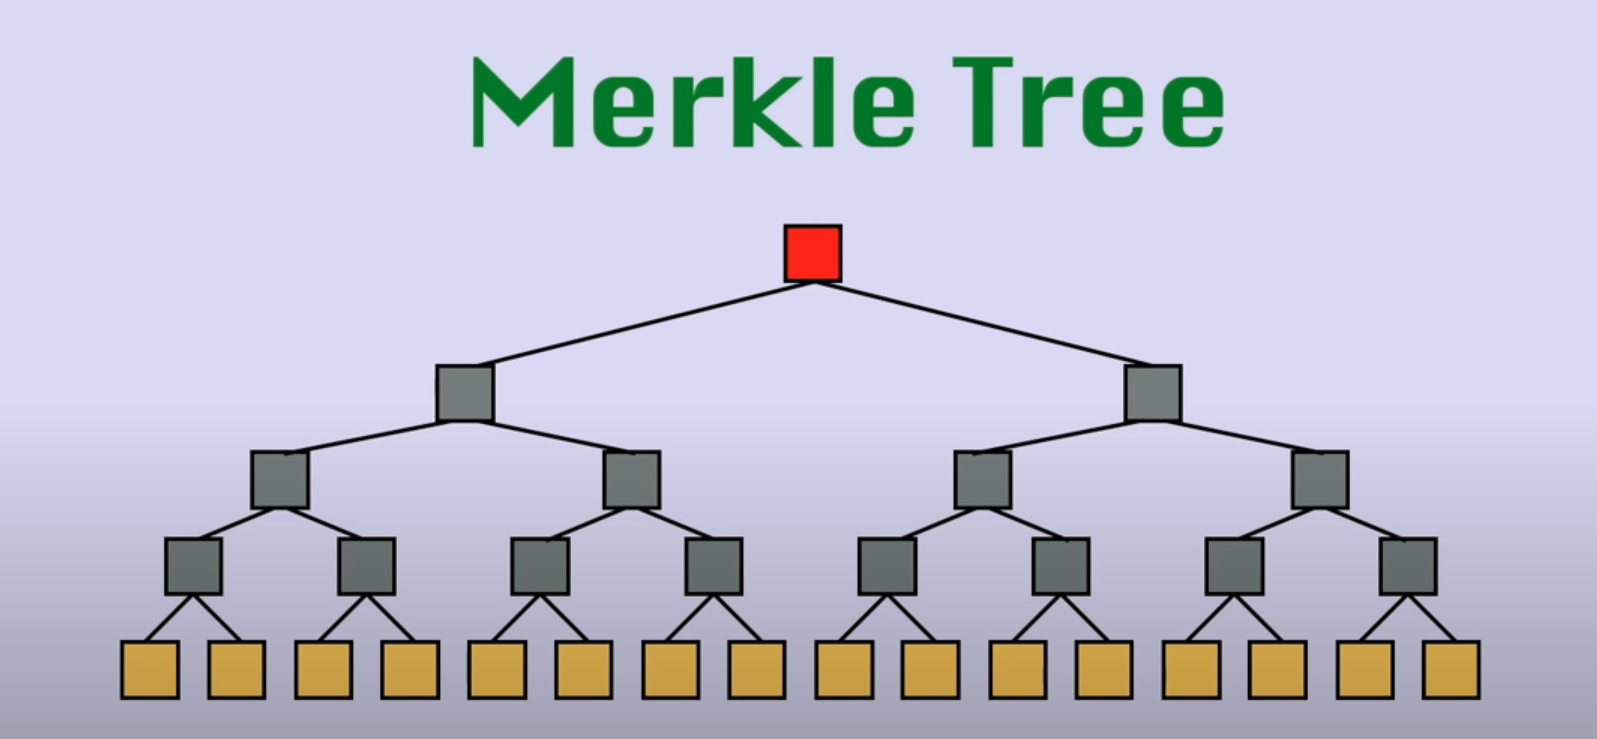

In [2]:
display(Image(filename='images/Merkle1.png', embed=True))


Cada nodo hoja es un hash de un pedazo de información y cada nodo no hoja es un hash de sus hijos. Esto resulta en un hash único llamado la Raíz Merkle. Si cada nodo tiene dos hijos, entonces es llamado un árbol de hash binario.

Al procesar toda la información y concatenarla en forma de hash, la raíz del árbol contendrá toda la información del árbol. Esto es muy útil cuando queremos comprobar si existe cierto nodo en el árbol.

Utilizando poca información, podemos hacer comparaciones con bajo costo de tiempo y memoria. Mientras más nodos hojas tengamos, menos valores de hash serán necesarios en comparación a la cantidad de nodos. Es decir, esta estructura escala óptimamente. De hecho, es posible comprobar que una noda hoja es parte de un árbol de hash binario tiene complejidad **$O(log(N))$**, con N número de hojas del árbol.

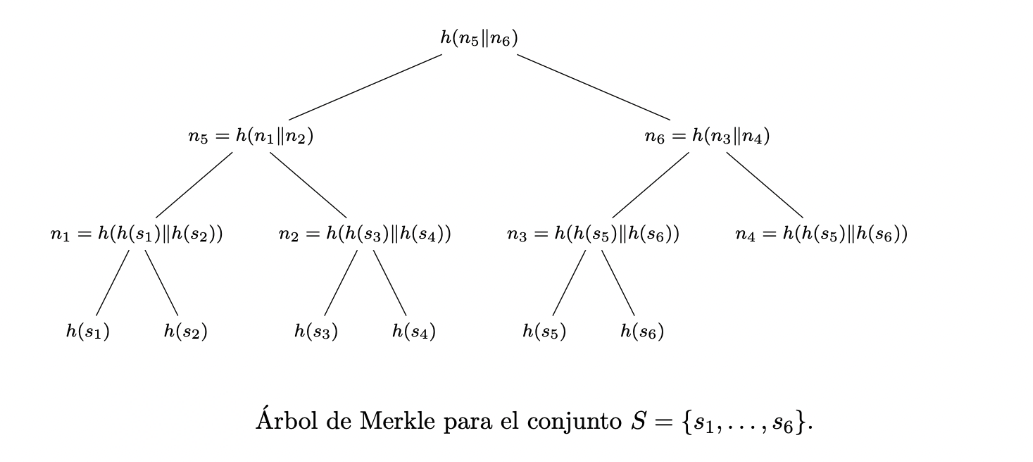

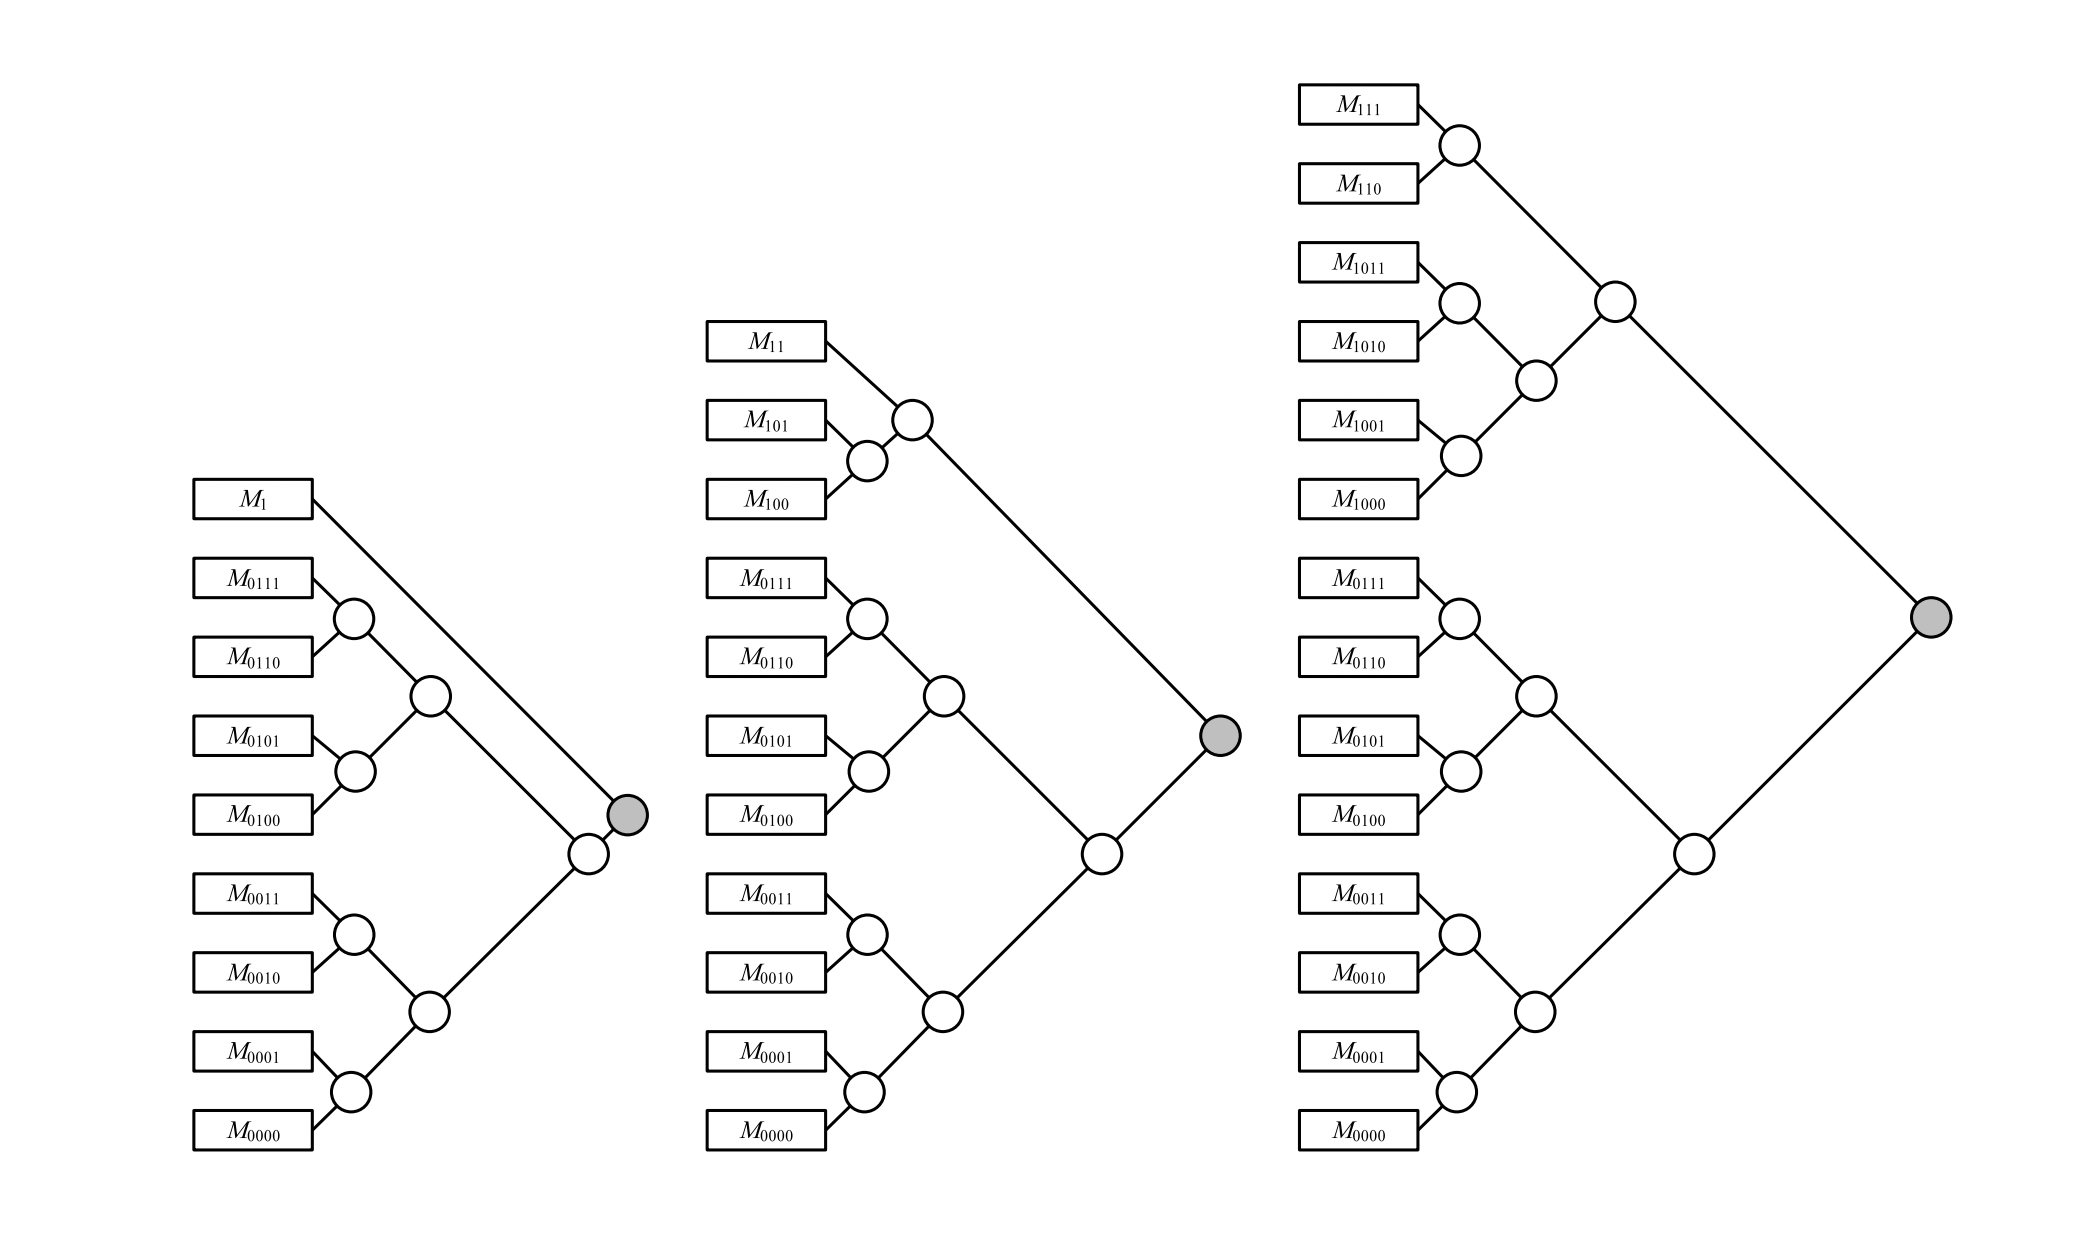

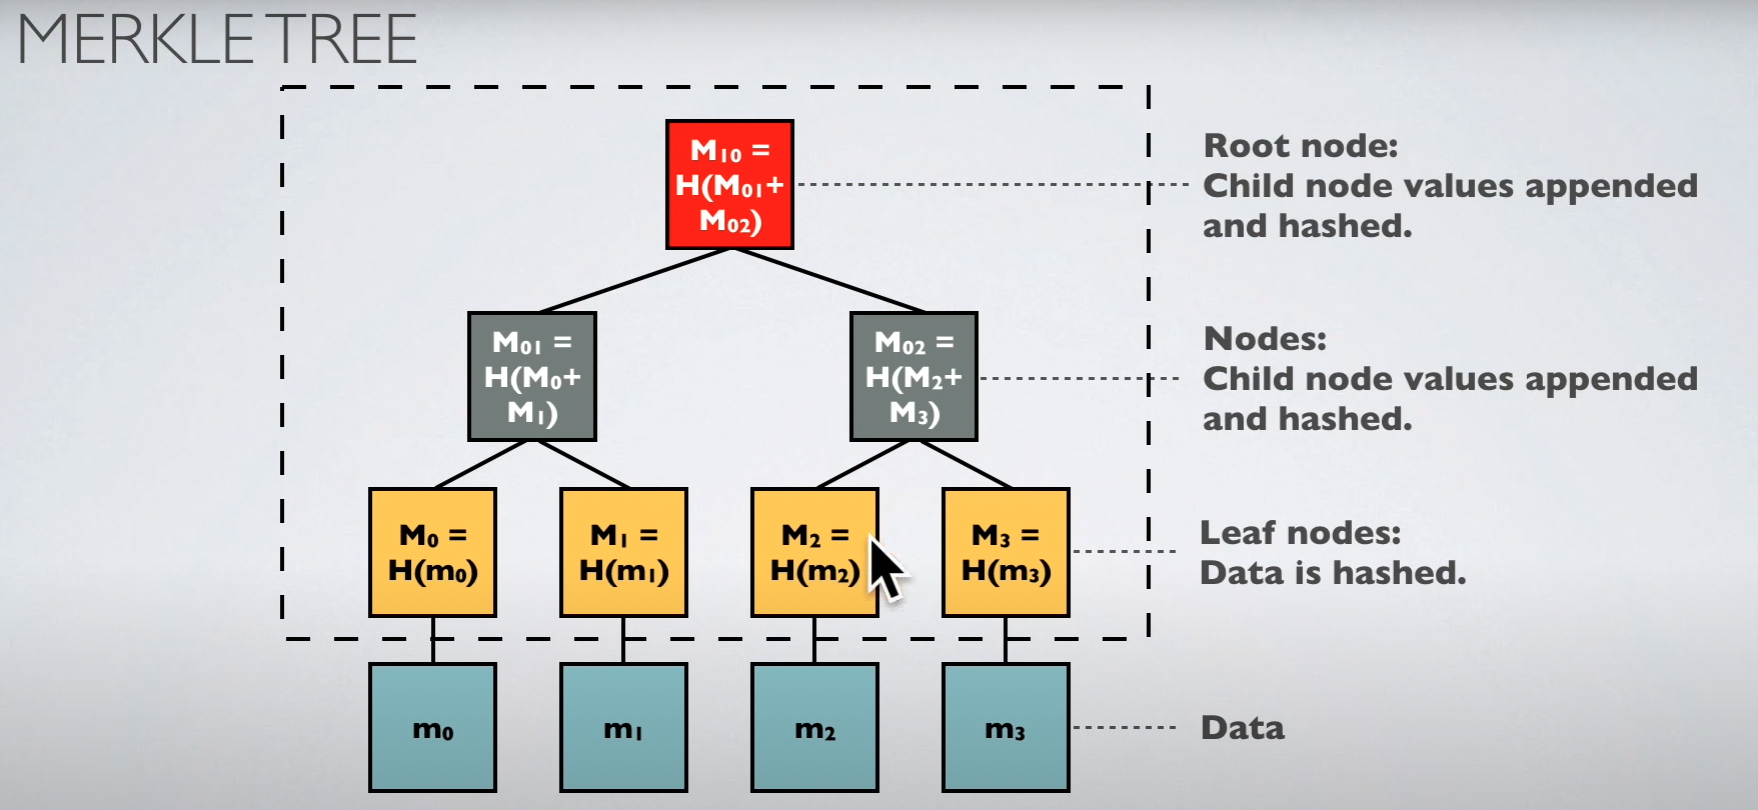

In [3]:
display(Image(filename='images/Merkle4.png', embed=True))
display(Image(filename='images/Merkle5.png', embed=True))
display(Image(filename='images/Merkle2.png', embed=True))



Se dice tener un árbol de Merkle perfecto cuando
- |hojas| = $2^{n}$
- Cada nodo tiene *0 o 2* hijos
- Cada hoja está en el mismo nivel.

Y aplican las siguientes fórmulas:
- |hojas| = $L = (N+1)/2$
- |nodos| = $2L - 1$
- |niveles| = $log_{2}(L) + 1$
- |niveles| = $(ln(L) \space / \space ln(2)) + 1$

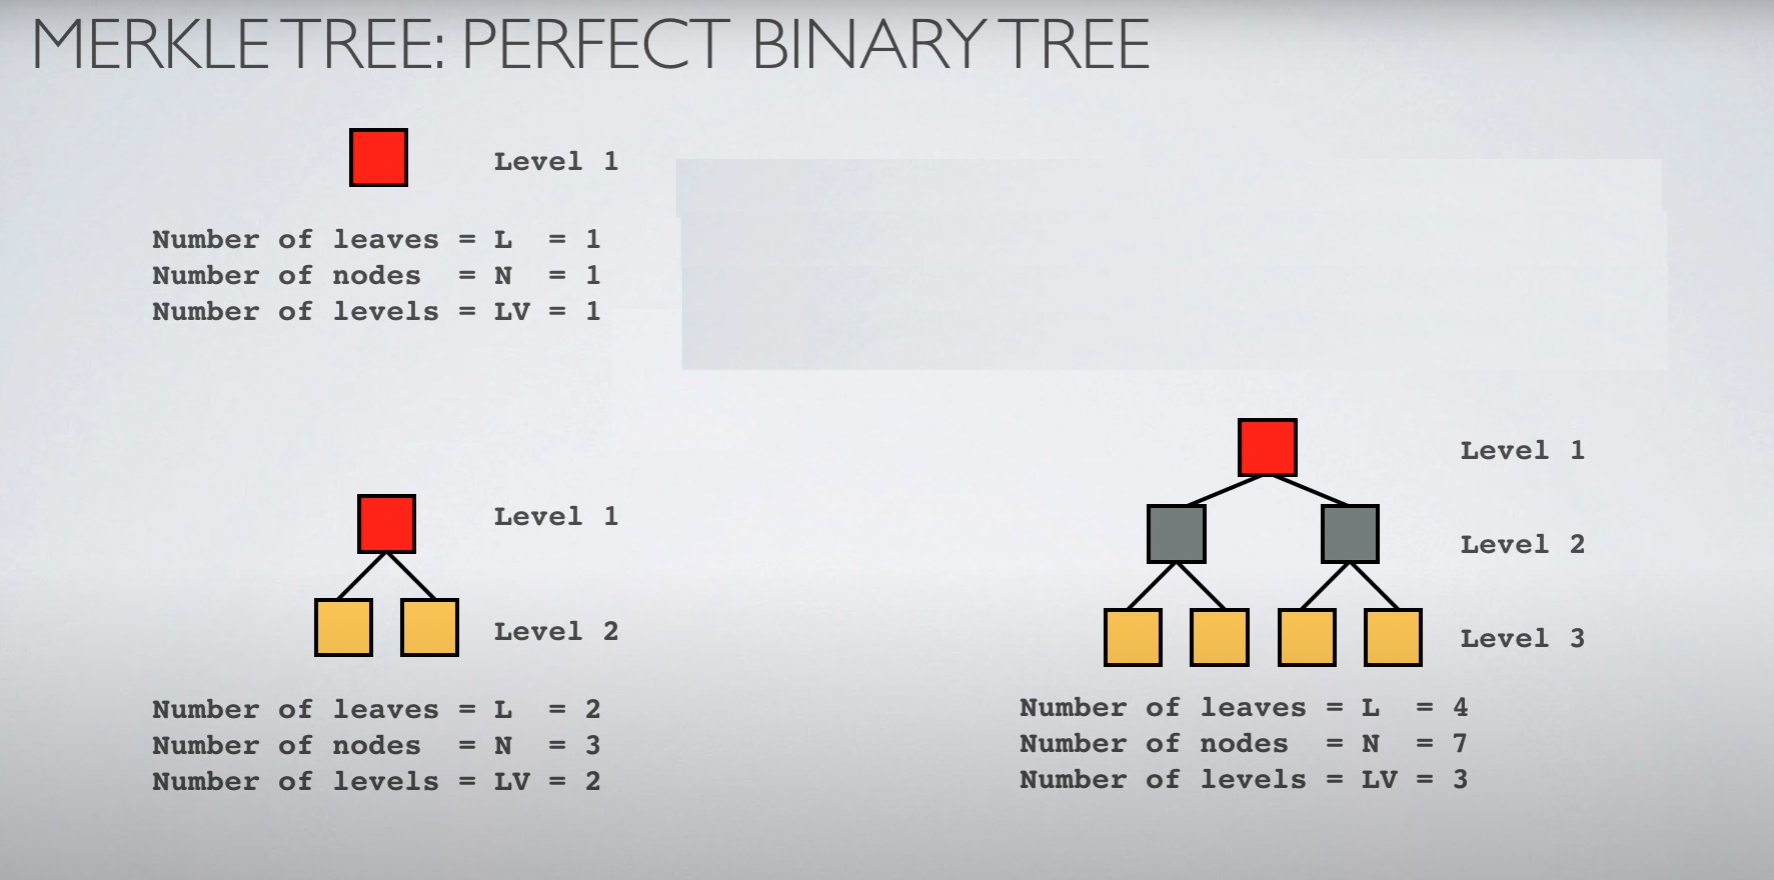

In [4]:
display(Image(filename='images/Merkle3.png', embed=True))



El procedimiento para armar uno se vería algo parecido a:

1. Procesar datos i.e. file, private key.
2. Hasheamos la data y guardamos esa información en las hojas.
3. Feed forward los valores hacia la raíz siguiendo la regla padre.valor = hash(padre.hijo_izq.valor + padre.hijo_der.valor)
4. Finalizar al llenar la raíz. En este punto tenemos una Merkle Root.


# Merkle Tree Python Implementation

In [5]:
import hashlib
import random

HASH_TYPES = ['md5', 'sha224', 'sha256', 'sha384', 'sha512',
              'sha3_224', 'sha3_256', 'sha3_384', 'sha3_512']


def MD5(string):
    return hashlib.md5(string.encode()).hexdigest()

def SHA256(string):
    return hashlib.sha256(string.encode()).hexdigest()


def is_power_of_two(number):
    if (number == 0):
        return False
    while (number != 1):
            if (number % 2 != 0):
                return False
            number = number // 2
             
    return True


class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'


We will save hash information and pointers to parent and sibling nodes. 

The tag value for leaf nodes will be equal to $h(s_{i})$, being s_{i} an element from $S = {s_{1}, ..., s{n}}$ with arbitrary n. 

Function h() represents arbitrary hash function assigned by user.

We will use parent information in order to go upwards while creating the proof of verification.

Original messages $S = {s_{1}, ..., s{n}}$ will be stored in nodes just for reference and debugging. 

They won't be used anymore after Tree creation, basing all operations on hash information.

In [6]:


class MerkleNode:
    def __init__(self, left_child, right_child, hashed_content, raw_content, leaf=False):
        self.left_child = left_child
        self.right_child = right_child
        self.hashed_content = hashed_content
        self.raw_content = raw_content
        self.parent = None
        self.relative_position = None
        self.leaf = leaf
      
    def __str__(self):
        return(str(self.hashed_content))

MerkleTree structure
* build_tree
* _recurse_tree
* _fill_tree_information
* get_root
* get_proof_for
* _set_hash_function
* _hash
* show_nodes_info
* __recurse_nodes_info

In [7]:


class MerkleTree:
    def __init__(self, raw_data, hash_func=MD5):
        """
          strings: The set of strings S 
          hash_func: "Any" hashing method
        """
        self.raw_data = raw_data
        self.len_leaves = len(raw_data)
        self.hash_func = hash_func
        self.root = None
        
        """
        self.hash_type = None
        self.algorithm = None
        Accept "Any" hashing method
        self._set_hash_function()
        """
        
        # Recursively build the tree
        self.build_tree()
                  

    def build_tree(self):
        """
        Recursive method to fill the tree nodes using raw data
        """
        print("Creating Tree")

        if self.len_leaves == 0:
            print("Empty set of strings S = {s_{1}, ..., s_{n}}")
            return None

        # Handle uneven data
        self._fill_tree_information()

        # Process raw data and start filling tree nodes
        self.leaves = [
            MerkleNode(None, 
                       None, 
                       self._hash(rw), 
                       rw,
                       True) for rw in self.raw_data
        ]

        # Clean structure as we already processed everything
        self.raw_data = ""

        # Build Tree
        self.root = self._recurse_tree(self.leaves)
        self.root.parent = "None | Root"
        self.relative_position = "Root"
        
        print("Tree created !")


    def _recurse_tree(self, nodes):
        if len(nodes) == 2:
            left_node = nodes[0]
            right_node = nodes[1]
            hashed_content = self._hash(left_node.hashed_content + right_node.hashed_content)
            raw_content = left_node.raw_content + "+" + right_node.raw_content

            created_node = MerkleNode(
                left_node, 
                right_node, 
                hashed_content, 
                raw_content
            )

            left_node.parent = created_node
            left_node.relative_position = "i"

            right_node.parent = created_node
            right_node.relative_position = "d"

            return created_node
        
        
        _split = len(nodes) // 2
        left = self._recurse_tree(nodes[:_split])
        left_raw_content = left.raw_content

        right = self._recurse_tree(nodes[_split:])
        right_raw_content = right.raw_content

        concat_childs_hashes = left.hashed_content + right.hashed_content
        hashed_content = self._hash(concat_childs_hashes)
        
        concat_childs_contents = left_raw_content + "+" + right_raw_content
        raw_content = str(concat_childs_contents)

        _created_node = MerkleNode(
                  left, 
                  right, 
                  hashed_content, 
                  raw_content
                  )
    
        left.parent = _created_node
        left.relative_position = "i"

        right.parent = _created_node
        right.relative_position = "d"

        return _created_node

    
    def _fill_tree_information(self):
        if not is_power_of_two(self.len_leaves):
            if is_power_of_two(self.len_leaves + 1):
                # Just repeat last element
                _last = self.raw_data[-1]
                self.raw_data.append(_last)

            else:
                # Fill with last valid chunks of info
                # Find the closest power of two
                last_power = self.len_leaves
                while not is_power_of_two(last_power):
                    last_power -= 1

                if self.len_leaves % 2 != 0:
                    # Odd number. Complete until even, then complete with info
                    _last = self.raw_data[-1]
                    self.raw_data.append(_last)

                last_chunk = self.raw_data[last_power:]
                # print("LAST CHUNK", last_chunk)

                while not is_power_of_two(len(self.raw_data)):
                    # Even number of leaves. Complete with info
                    self.raw_data.extend(last_chunk)

                # print("self.raw_data now is ", self.raw_data)
            
            
    def get_root(self):
        """
        Output
            root: Root of the Merkle Tree. 
        """
        return self.root.hashed_content
  

    def get_proof_for(self, item_):
        """
        result: - None if the item is not part of the leafs of the tree 
                - A list with the necessary info to prove that the item is part of the leafs of the tree
        """
        
        hashed_item = self._hash(item_)
        
        found_leaf = None
        for leaf in self.leaves:
            if leaf.hashed_content == hashed_item:
                found_leaf = leaf
                break

        if not found_leaf:
            return None

        # Found item, share info
        prepare_info = []

        # Traverse tree upwards using parent pointer. Will always have sibling by construction.
        curr_node = found_leaf
        while curr_node.parent != "None | Root":
            curr_parent = curr_node.parent

            if curr_node.relative_position == "d":
                sibling = curr_parent.left_child
                prepare_info.append((sibling.hashed_content, "i"))

            else:
                sibling = curr_parent.right_child
                prepare_info.append((sibling.hashed_content, "d"))

            curr_node = curr_parent
        
        return prepare_info
    
    
    def _set_hash_function(self):
        # Support "any" hashing method
        ht = self.hash_func.lower().replace('-', '_')
        
        if ht not in HASH_TYPES:
            err = f'Hash type {hash_func} is not supported'
            print(err)

        self.hash_type = ht
        self.algorithm = getattr(hashlib, self.hash_type)
        

    def _hash(self, value):
        hexdigest = self.hash_func(value)
        # hexdigest = self.algorithm(data).hexdigest()
        return hexdigest

    
    def show_nodes_info(self):
        self.__recurse_nodes_info(self.root)

        
    def __recurse_nodes_info(self, node):
        if node != None:
            print("------------------------------ Node ------------------------------")
            print("Hashed Content: {0} \nRaw Content: {1} \nRelative Position: {2} \nParent: {3}  ".format(
                node.hashed_content, 
                node.raw_content,
                node.relative_position, 
                node.parent))
            
            if node.leaf:
                print("No childs | Leaf Node")
                print("------------------------------------------------------------------ \n\n")
                
            else:
                print("Left Child: " + str(node.left_child))
                print("Right Child: " + str(node.right_child)) 
                print("------------------------------------------------------------------ \n\n")
                self.__recurse_nodes_info(node.left_child)
                self.__recurse_nodes_info(node.right_child)
            
           

Let's create a Merkle Tree example and see how it constructs.

In [8]:

raw_data = ["First_Node", 
            "Second_Node", 
            "Third_Node", 
            "Fourth_Node", 
            "Fifth_Node", 
            "Sixth_Node"]


Merkle_Tree = MerkleTree(raw_data, MD5)

Creating Tree
Tree created !


# Root

Let's see the Merkle Tree's root. The hashed content from this particular node will be useful later for verification tasks. This hash was obtained by hashing all nodes from the tree.

In [9]:
MerkleRoot = Merkle_Tree.get_root()
print("MerkleRoot hashed information", MerkleRoot)

MerkleRoot hashed information 1164be372dd479c2a481cd9a3b65f85e


Let's see the nodes, check hashed values and connections

In [10]:
Merkle_Tree.show_nodes_info()

------------------------------ Node ------------------------------
Hashed Content: 1164be372dd479c2a481cd9a3b65f85e 
Raw Content: First_Node+Second_Node+Third_Node+Fourth_Node+Fifth_Node+Sixth_Node+Fifth_Node+Sixth_Node 
Relative Position: None 
Parent: None | Root  
Left Child: 3a53be94d22abb5187bb8c084ce10df5
Right Child: 09381718d0b3d6220e72ab7a79c06091
------------------------------------------------------------------ 


------------------------------ Node ------------------------------
Hashed Content: 3a53be94d22abb5187bb8c084ce10df5 
Raw Content: First_Node+Second_Node+Third_Node+Fourth_Node 
Relative Position: i 
Parent: 1164be372dd479c2a481cd9a3b65f85e  
Left Child: aaa329540c83b06c7f801dc500b44967
Right Child: 3b6be4550db84fee1e30c46962992990
------------------------------------------------------------------ 


------------------------------ Node ------------------------------
Hashed Content: aaa329540c83b06c7f801dc500b44967 
Raw Content: First_Node+Second_Node 
Relative Posit

We see that it correctly constructed the tree, with each non leaf node containing hash information about its childs. The root now represents a hash that compressed information of all the tree. We can use this to validate information when someone challenges the contents. 

A proof of presence will contain an especific element, it's sibling and the siblings of all its ancestors. i.e.

In [11]:
print(Merkle_Tree.get_proof_for("Third_Node"))

[('969353e1a9a374025360c2ee9607e703', 'd'), ('aaa329540c83b06c7f801dc500b44967', 'i'), ('09381718d0b3d6220e72ab7a79c06091', 'd')]


In [12]:
print(Merkle_Tree.get_proof_for("ThisInfoDoesNotExistInTheTree"))

None


We see we can retrieve a valid proof for existing information, and error handling if information is not present.

## We create a validation test that receives a proof that an element is in a Merkle Tree, and returns true if proof correct, False otherwise.

In [13]:
def _rebuild_root(proof, item, hash_):
    curr_hash = hash_(item)

    print("Current hash", curr_hash)

    while proof:
        curr_node = proof.pop(0)
        print("Current node being processed", curr_node)

        if curr_node[1] == "d":
            print("Current hash", curr_hash)
            sibling_hash = curr_node[0]
            print("Concatenating with its right sibling, \nRight Sibling:", sibling_hash)
            
            value_to_hash = curr_hash + sibling_hash
            curr_hash = hash_(value_to_hash)
            print("Obtained this hash", curr_hash, "\n")

        else:
            print("Current hash", curr_hash)
            sibling_hash = curr_node[0]
            print("Concatenating with its left sibling, \nLeft Sibling:", sibling_hash)

            value_to_hash = sibling_hash + curr_hash
            curr_hash = hash_(value_to_hash)
            
            print("Obtained this hash", curr_hash, "\n")

    print("Final Hash constructed from", curr_hash)
    return curr_hash


def verify(root, item, proof, hash_):
    """
        root: The root of a merkle tree
        item: An abritrary string
        proof: An alleged proof that item is part of a Merkle
        tree with root root
        hash_func: An arbitrary hash function
        
        Returns:
        correct: whether the proof is correct or not
    """
    
    _proof = proof.copy()
    check_correctness = str(root) == str(_rebuild_root(_proof, item, hash_))
    print("Correct result would be: ", str(root))
    
    print(color.BOLD, "\n Is the proof correct ?", "-"*70)
    print("-------------------------------", check_correctness, "-------------------------------")
    print("-"*70, color.END)
    return check_correctness


## Case 1: Item not present in tree, false proof

In [14]:

raw_data = ["First_Node", 
            "Second_Node", 
            "Third_Node", 
            "Fourth_Node", 
            "Fifth_Node", 
            "Sixth_Node"]


Merkle_Tree = MerkleTree(raw_data, MD5)
MerkleRoot = Merkle_Tree.get_root()
print("MerkleRoot hashed information", MerkleRoot)


element = "I do not exist in the tree"
alleged_proof = [('49618a98570070b3676ba14a616de8d5', 'd'), 
                 ('3b6be4550db84fee1e30c46962992990', 'd'), 
                 ('09381718d0b3d6220e72ab7a79c06091', 'd')]
hash_func = MD5

verify(MerkleRoot, element, alleged_proof, hash_func)

Creating Tree
Tree created !
MerkleRoot hashed information 1164be372dd479c2a481cd9a3b65f85e
Current hash f693e6ff46414c6119f900c5b23f3325
Current node being processed ('49618a98570070b3676ba14a616de8d5', 'd')
Current hash f693e6ff46414c6119f900c5b23f3325
Concatenating with its right sibling, 
Right Sibling: 49618a98570070b3676ba14a616de8d5
Obtained this hash 94a63db133338bd98ee67394707b8969 

Current node being processed ('3b6be4550db84fee1e30c46962992990', 'd')
Current hash 94a63db133338bd98ee67394707b8969
Concatenating with its right sibling, 
Right Sibling: 3b6be4550db84fee1e30c46962992990
Obtained this hash 08813e13b6fe7c5c9e1df3956d7ca611 

Current node being processed ('09381718d0b3d6220e72ab7a79c06091', 'd')
Current hash 08813e13b6fe7c5c9e1df3956d7ca611
Concatenating with its right sibling, 
Right Sibling: 09381718d0b3d6220e72ab7a79c06091
Obtained this hash 32a1324df1f021bd52ff59b1737e1e9a 

Final Hash constructed from 32a1324df1f021bd52ff59b1737e1e9a
Correct result would be:  1

False

## Caso 2: Item does exist in tree, proof correct, root correctly reconstructed

In [15]:
raw_data = ["First_Node", 
            "Second_Node", 
            "Third_Node", 
            "Fourth_Node", 
            "Fifth_Node", 
            "Sixth_Node"]


Merkle_Tree = MerkleTree(raw_data, MD5)
MerkleRoot = Merkle_Tree.get_root()
print("MerkleRoot hashed information", MerkleRoot)


element = "Third_Node"
alleged_proof = [('969353e1a9a374025360c2ee9607e703', 'd'), 
                 ('aaa329540c83b06c7f801dc500b44967', 'i'), 
                 ('09381718d0b3d6220e72ab7a79c06091', 'd')]

alleged_proof = Merkle_Tree.get_proof_for("Third_Node")

print(alleged_proof)
verify(MerkleRoot, element, alleged_proof, MD5)

Creating Tree
Tree created !
MerkleRoot hashed information 1164be372dd479c2a481cd9a3b65f85e
[('969353e1a9a374025360c2ee9607e703', 'd'), ('aaa329540c83b06c7f801dc500b44967', 'i'), ('09381718d0b3d6220e72ab7a79c06091', 'd')]
Current hash d095b42be1618ea90c7fbd472e5d88af
Current node being processed ('969353e1a9a374025360c2ee9607e703', 'd')
Current hash d095b42be1618ea90c7fbd472e5d88af
Concatenating with its right sibling, 
Right Sibling: 969353e1a9a374025360c2ee9607e703
Obtained this hash 3b6be4550db84fee1e30c46962992990 

Current node being processed ('aaa329540c83b06c7f801dc500b44967', 'i')
Current hash 3b6be4550db84fee1e30c46962992990
Concatenating with its left sibling, 
Left Sibling: aaa329540c83b06c7f801dc500b44967
Obtained this hash 3a53be94d22abb5187bb8c084ce10df5 

Current node being processed ('09381718d0b3d6220e72ab7a79c06091', 'd')
Current hash 3a53be94d22abb5187bb8c084ce10df5
Concatenating with its right sibling, 
Right Sibling: 09381718d0b3d6220e72ab7a79c06091
Obtained this 

True

## Case 3: Item does exist but proof is incorrect

In [16]:
raw_data = ["First_Node", 
            "Second_Node", 
            "Third_Node", 
            "Fourth_Node", 
            "Fifth_Node", 
            "Sixth_Node"]


Merkle_Tree = MerkleTree(raw_data, MD5)
MerkleRoot = Merkle_Tree.get_root()
print("MerkleRoot hashed information", MerkleRoot)


element = "Fifth_Node"
alleged_proof = ['Fifth_Node', ('49618a98570070b3676ba14a616de8d5', 'd'), 
                 ('3b6be4550db84fee1e30c46962992990', 'd'), 
                 ('09381718d0b3d6220e72ab7a79c06091', 'd')]


verify(MerkleRoot, element, alleged_proof, MD5)


Creating Tree
Tree created !
MerkleRoot hashed information 1164be372dd479c2a481cd9a3b65f85e
Current hash 1f6a537726ac473c8d19f0eb70fa5fa6
Current node being processed Fifth_Node
Current hash 1f6a537726ac473c8d19f0eb70fa5fa6
Concatenating with its left sibling, 
Left Sibling: F
Obtained this hash a00d1e1ec181adb633fb718b925528f1 

Current node being processed ('49618a98570070b3676ba14a616de8d5', 'd')
Current hash a00d1e1ec181adb633fb718b925528f1
Concatenating with its right sibling, 
Right Sibling: 49618a98570070b3676ba14a616de8d5
Obtained this hash 345eabaedafbfe4c012a6ad6130f6a08 

Current node being processed ('3b6be4550db84fee1e30c46962992990', 'd')
Current hash 345eabaedafbfe4c012a6ad6130f6a08
Concatenating with its right sibling, 
Right Sibling: 3b6be4550db84fee1e30c46962992990
Obtained this hash 7c888a3305c3245e0d3009e602e8830c 

Current node being processed ('09381718d0b3d6220e72ab7a79c06091', 'd')
Current hash 7c888a3305c3245e0d3009e602e8830c
Concatenating with its right siblin

False

## We see that our Verify method correctly reconstructs root hash.

## Now, as stress tests, we try with different lenghts of inputs and different hash functions

# We need to see if our construction handles variable size in input string lenght and amount of words, handling edge cases like |S| = 0, 1 or 2, and any 2k, 2k + 1 possible.

# Also, we need to try to use any hashing function use any hashing function of choice to encrypt the tree values.

# We also need to test that the verify function handles all possible cases as well, correctly reconstructs roots and handles any time of hashing function.


In [17]:
random_words = "Its dangerous to go alone! Take this It's a secret to everybody Grumble Grumble Dodongo Dislikes Smoke Hey! Listen!"
raw_data = random_words.split()
raw_data

['Its',
 'dangerous',
 'to',
 'go',
 'alone!',
 'Take',
 'this',
 "It's",
 'a',
 'secret',
 'to',
 'everybody',
 'Grumble',
 'Grumble',
 'Dodongo',
 'Dislikes',
 'Smoke',
 'Hey!',
 'Listen!']

In [18]:

HASH_TYPES = ['md5', 'sha224', 'sha256', 'sha384', 'sha512',
              'sha3_224', 'sha3_256', 'sha3_384', 'sha3_512']

def SHA3384(string):
    return hashlib.md5(string.encode()).hexdigest()

def SHA384(string):
    return hashlib.sha256(string.encode()).hexdigest()


def stress_test_methods():
    # For many different hash methods
    for hash_method in [MD5, SHA256, SHA384, SHA3384]:
        total_words = len(raw_data)
        # For all possible lengths of information. Arbitrary data
        for word_range in range(2, total_words):
            # Create a random subset of words, check that Trees construct correctly
            word_sub_set = random.sample(raw_data, word_range)
            current_merkle_tree = MerkleTree(word_sub_set, hash_method)

            print("Creating Merkle Tree with data:")
            print(word_sub_set)

            check_element = random.choice(word_sub_set)
            print("Getting proof for ", check_element)

            alleged_proof = current_merkle_tree.get_proof_for(check_element)
            print("Alleged proof ", alleged_proof)

            current_merkle_root = current_merkle_tree.get_root()
            print("Reconstructs Merkle Root correctly ?? \nCurrent Merkle Root: ", current_merkle_root, "\n")
            verify(current_merkle_root, check_element, alleged_proof, hash_method)
            
            
stress_test_methods()
    

Creating Tree
Tree created !
Creating Merkle Tree with data:
['Hey!', 'Grumble']
Getting proof for  Hey!
Alleged proof  [('a0130c0af33a6ae0cd292e010a68ce87', 'd')]
Reconstructs Merkle Root correctly ?? 
Current Merkle Root:  06f1a711c422b0db25afff6b258b68ff 

Current hash 6ae99d4d2de5e3cbd29fec87ae7d76eb
Current node being processed ('a0130c0af33a6ae0cd292e010a68ce87', 'd')
Current hash 6ae99d4d2de5e3cbd29fec87ae7d76eb
Concatenating with its right sibling, 
Right Sibling: a0130c0af33a6ae0cd292e010a68ce87
Obtained this hash 06f1a711c422b0db25afff6b258b68ff 

Final Hash constructed from 06f1a711c422b0db25afff6b258b68ff
Correct result would be:  06f1a711c422b0db25afff6b258b68ff
 
 Is the proof correct ? ----------------------------------------------------------------------
------------------------------- True -------------------------------
---------------------------------------------------------------------- 
Creating Tree
Tree created !
Creating Merkle Tree with data:
['Smoke', 'alone!

Obtained this hash 2cef76782c60e17c713db37b174bf4d84837821661e943d2cdb325d2b25eeeee 

Current node being processed ('9176c8dcc95146f8b1d827f759ce2de3ceac11327821fa581d78629abc3d16b5', 'd')
Current hash 2cef76782c60e17c713db37b174bf4d84837821661e943d2cdb325d2b25eeeee
Concatenating with its right sibling, 
Right Sibling: 9176c8dcc95146f8b1d827f759ce2de3ceac11327821fa581d78629abc3d16b5
Obtained this hash 9b31f0d521816667423bfdff4bc32fd674ad73fb5f8edc191e4e94f427c91ef7 

Current node being processed ('3044d1d6924a466e4569809f43d1c793117b6c33b8d2a2f5abc89ce8992f7a17', 'i')
Current hash 9b31f0d521816667423bfdff4bc32fd674ad73fb5f8edc191e4e94f427c91ef7
Concatenating with its left sibling, 
Left Sibling: 3044d1d6924a466e4569809f43d1c793117b6c33b8d2a2f5abc89ce8992f7a17
Obtained this hash 8ad3fe58e42c83b239b80b912fe3633ee460071bc40676f8f2dd0c81b7bc65a0 

Current node being processed ('733fd2ce3a5bed0bccaae9bc6a5645143ea5aac577363938044795dc521bf375', 'd')
Current hash 8ad3fe58e42c83b239b80b912fe3

Current node being processed ('c514eab474148a9ae8f675dd5bb29d082f72e5dd40a90eec99a7bcf43f3f1557', 'd')
Current hash c514eab474148a9ae8f675dd5bb29d082f72e5dd40a90eec99a7bcf43f3f1557
Concatenating with its right sibling, 
Right Sibling: c514eab474148a9ae8f675dd5bb29d082f72e5dd40a90eec99a7bcf43f3f1557
Obtained this hash 00d35bb30a7dfb20e23f32d6bc0e9a9c9155d09906fc29eb3e72c55f97160f75 

Current node being processed ('11cffcca23f9b00f88a2e2b5a12241b485b70ce80d32cb3a5dc1a09bf0c306a8', 'i')
Current hash 00d35bb30a7dfb20e23f32d6bc0e9a9c9155d09906fc29eb3e72c55f97160f75
Concatenating with its left sibling, 
Left Sibling: 11cffcca23f9b00f88a2e2b5a12241b485b70ce80d32cb3a5dc1a09bf0c306a8
Obtained this hash 5409be654e2b904f8b5ac8dc6712dc3dca4bb9283b330481343bf7e2ec5a6a43 

Final Hash constructed from 5409be654e2b904f8b5ac8dc6712dc3dca4bb9283b330481343bf7e2ec5a6a43
Correct result would be:  5409be654e2b904f8b5ac8dc6712dc3dca4bb9283b330481343bf7e2ec5a6a43
 
 Is the proof correct ? --------------------

# We see that our construction handles variable size in input string lenght and amount of words, handling edge cases like |S| = 0, 1 or 2, and any 2k, 2k + 1 possible.

# We note that it is also possible to use any hashing function of choice

# We see that verify function handles all possible cases as well, correctly reconstructs roots and handles any time of hashing function.